# Further Visualisation of HadUK Data

In [100]:
!conda install -c conda-forge netcdf4 xarray dask matplotlib numpy pandas -y

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import netCDF4 as nc
import dask

347521.62s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
Channels:
 - conda-forge
 - defaults
Platform: osx-64
Solving environment: done

# All requested packages already installed.



In [117]:
#Opening a single netCDF file
data = xr.open_dataset(r"/Users/maxMax/Desktop/Datasets/12km/tas/mon/v20240514/tas_hadukgrid_uk_12km_mon_188401-188412.nc")

#Opening all the netCDF files in a directory and merging them into one variable - must use /*.cd after folder name to extract all netCDF files in folder.
data_temp = xr.open_mfdataset(r"/Users/maxMax/Desktop/Datasets/12km/tas/mon/v20240514/*.nc", parallel=False) #Always set parallel to False when using open_mfdataset. There is a bug in the package.

data_one_year = data.tas.values
data_all_months = data_temp.tas.values

The following allows for the comparative analysis of the HadUK data for each month, averaged over the years 1884 - 2023:

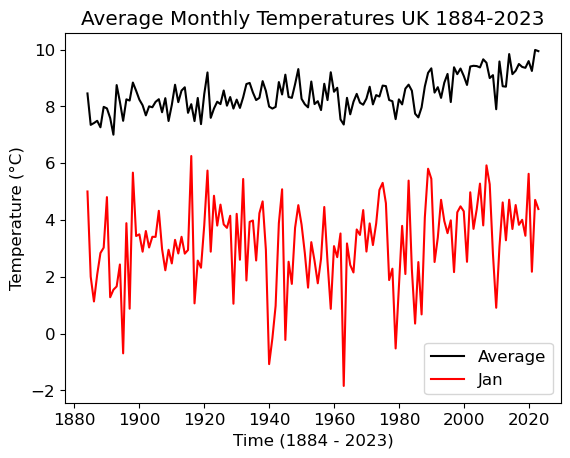

In [102]:
from skimage.measure import block_reduce

time_index = pd.to_datetime(data_temp.time.values)#converting the time coords into a panda datatframe so that they're easy to filter
temp = block_reduce(data_all_months, block_size=(12,1,1), func=np.mean, cval=np.mean(data_all_months))

jan_data = data_temp.sel(time=time_index.month == 1)
feb_data = data_temp.sel(time=time_index.month == 2)
mar_data = data_temp.sel(time=time_index.month == 3)
apr_data = data_temp.sel(time=time_index.month == 4)
may_data = data_temp.sel(time=time_index.month == 5)
jun_data = data_temp.sel(time=time_index.month == 6)
jul_data = data_temp.sel(time=time_index.month == 7)
aug_data = data_temp.sel(time=time_index.month == 8)
sep_data = data_temp.sel(time=time_index.month == 9)
oct_data = data_temp.sel(time=time_index.month == 10)
nov_data = data_temp.sel(time=time_index.month == 11)
dec_data = data_temp.sel(time=time_index.month == 12)

temp_jan = jan_data.tas.values
temp_feb = feb_data.tas.values
temp_mar = mar_data.tas.values
temp_apr = apr_data.tas.values
temp_may = may_data.tas.values
temp_jun = jun_data.tas.values
temp_jul = jul_data.tas.values
temp_aug = aug_data.tas.values
temp_sep = sep_data.tas.values
temp_oct = oct_data.tas.values
temp_nov = nov_data.tas.values
temp_dec = dec_data.tas.values

temp_mean = np.nanmean(temp, axis=(1, 2))
temp_mean_jan = np.nanmean(temp_jan, axis=(1, 2))
temp_mean_feb = np.nanmean(temp_feb, axis=(1, 2))
temp_mean_mar = np.nanmean(temp_mar, axis=(1, 2))
temp_mean_apr = np.nanmean(temp_apr, axis=(1, 2))
temp_mean_may = np.nanmean(temp_may, axis=(1, 2))
temp_mean_jun = np.nanmean(temp_jun, axis=(1, 2))
temp_mean_jul = np.nanmean(temp_jul, axis=(1, 2))
temp_mean_aug = np.nanmean(temp_aug, axis=(1, 2))
temp_mean_sep = np.nanmean(temp_sep, axis=(1, 2))
temp_mean_oct = np.nanmean(temp_oct, axis=(1, 2))
temp_mean_nov = np.nanmean(temp_nov, axis=(1, 2))
temp_mean_dec = np.nanmean(temp_dec, axis=(1, 2))

time = np.arange(1884,2024)

plt.plot(time, temp_mean, 'black', label = 'Average')
plt.plot(time, temp_mean_jan, 'red', label = 'Jan')
#plt.plot(time, temp_mean_feb, 'orange', label = 'Feb')
#plt.plot(time, temp_mean_mar, 'yellow', label = 'Mar')
#plt.plot(time, temp_mean_apr, 'green', label = 'Apr')
#plt.plot(time, temp_mean_may, 'blue', label = 'May')
#plt.plot(time, temp_mean_jun, 'navy', label = 'Jun')
#plt.plot(time, temp_mean_jul, 'indigo', label = 'Jul')
#plt.plot(time, temp_mean_aug, 'violet', label = 'Aug')
#plt.plot(time, temp_mean_sep, 'black', label = 'Sep')
#plt.plot(time, temp_mean_oct, 'grey', label = 'Oct')
#plt.plot(time, temp_mean_nov, 'cyan', label = 'Nov')
#plt.plot(time, temp_mean_dec, 'salmon', label = 'Dec')
plt.xlabel('Time (1884 - 2023)')
plt.ylabel('Temperature (°C)')
plt.title('Average Monthly Temperatures UK 1884-2023')
plt.rcParams.update({'font.size': 12})
plt.legend()
plt.show()

The following allows for the visualisation of temperature data in specific grid cells (specified by BNG latitude and longitude coordinates):

Nearest index for longitude: 57
Nearest index for latitude: 29


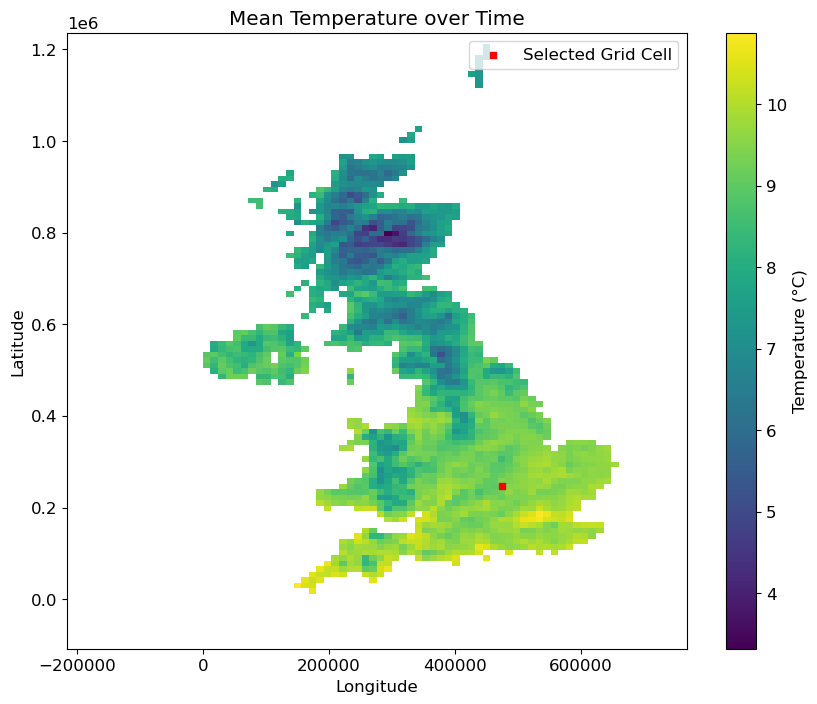

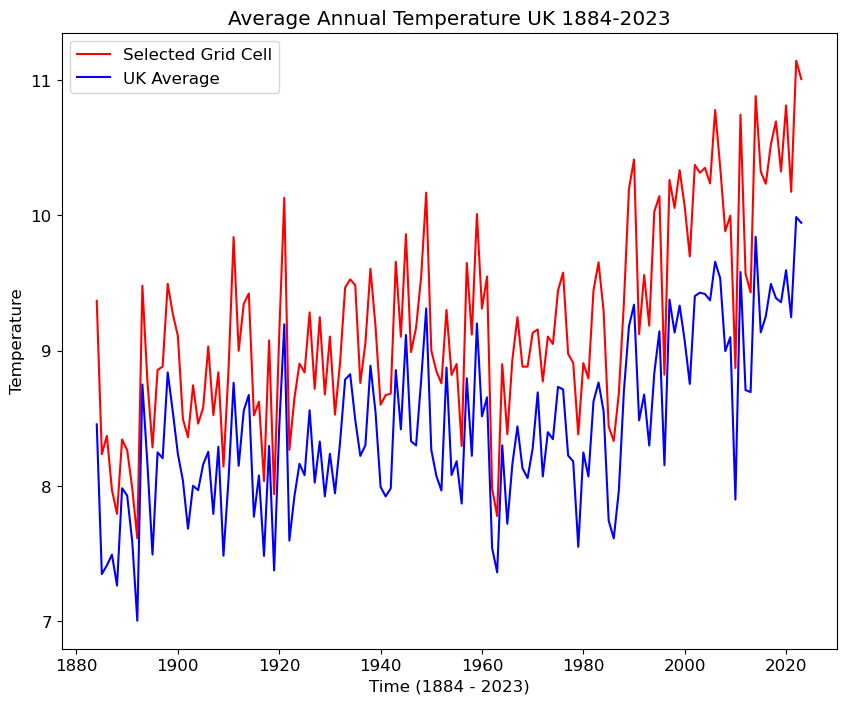

In [103]:
target_lon = 470000
target_lat = 250000

mean_temp = np.mean(data_all_months, axis=0) #mean temperature for all grid cells

lons = data_temp.projection_x_coordinate.values #creates an array of longitudes and latitudes (x and y coords) contained in dataset
lats = data_temp.projection_y_coordinate.values #using data_temp because this is a single cd file so contains single value for grid coordinates

lon_mesh, lat_mesh = np.meshgrid(lons, lats) #creates the meshgrid of lons and lats which transforms the 2 1D arrays into 2D arrays so that there is a workable coordinaate system

selected_point = data_temp.sel(projection_x_coordinate=target_lon, #using .sel method to select the grid cell with coordinates closest to the inputted long and lat.
                               projection_y_coordinate=target_lat, #projection_x/y_coordinate is the variable in the dataset that contains the x and y coords usinig the BNG system
                               method='nearest')

nearest_lon_idx = np.abs(lons - target_lon).argmin() #subtracts the inputted long/lat from every other value and creates an array of differnces between them, np.abs then takes the abs value of these and argmin returns the index of the grid cell witht the shortest distance from the target value
nearest_lat_idx = np.abs(lats - target_lat).argmin() #this is used because when selecting a grid cell for plotting later, it's easier to use the index

print(f"Nearest index for longitude: {nearest_lon_idx}") #checking which indicies have been selected
print(f"Nearest index for latitude: {nearest_lat_idx}")

plt.figure(figsize=(10, 8))
plt.pcolormesh(lon_mesh, lat_mesh, mean_temp, cmap='viridis', shading='auto') #plots the meshgrid creaated previously with a colourbar etc
cbar = plt.colorbar()
cbar.set_label("Temperature (°C)")

plt.scatter(lon_mesh[nearest_lat_idx, nearest_lon_idx], #overlays the meshgrid plot with a scatter plot containing one point plotted at the coords of the targeted grid cell (marker set to square for aesthetic purposes to make it clearer we are selecting a crid cell, does not highlight the grid cell specifically)
            lat_mesh[nearest_lat_idx, nearest_lon_idx], #using the indices to select the correct coordinate from the 2D arrays
            color='red', s=25, marker='s', label='Selected Grid Cell')
plt.xlabel('Longitude') #labelling the plot, adding legend to signify the highlighted region is the selected grid cell
plt.ylabel('Latitude')
plt.title('Mean Temperature over Time')
plt.legend()
plt.show()

#variables can be converted to numpy arrays
data_one_year = data.tas.values
data_all_months = data_temp.tas.values

#block reduce cuts the data into blocks and applies a function to each block (the function is the mean and the block size is 12 months)
temp = block_reduce(data_all_months[:,nearest_lat_idx, nearest_lon_idx], block_size=(12), func=np.mean, cval=np.mean(data_all_months))
temp_all = block_reduce(data_all_months, block_size=(12,1,1), func=np.mean, cval=np.mean(data_all_months))#(12,1,1) means we group the time dimension into blocks of 12 months 91 year) but 1 (y) and 1 (x) means that we retain the spatial dimensions alreaady present in the data, i.e. there is no grouping of spatial data

#data is then averaged over the coordinate dimensions with nanmean being used to ignore NaN values
temp_mean2 = np.nanmean(temp_all, axis=(1, 2)) #temp_all has already created a grid of average temperatures in 12 month segments, so here i set axis=(1,2) so that the nanmean function acts only over the x 910 and y (2) dimensions and does not try to average again over time (0)
time = np.arange(1884,2024)

plt.figure(figsize=(10, 8))
plt.plot(time, temp, 'r', label='Selected Grid Cell')
plt.plot(time, temp_mean2, 'b', label='UK Average')
plt.xlabel('Time (1884 - 2023)')
plt.ylabel('Temperature')
plt.title('Average Annual Temperature UK 1884-2023')
plt.rcParams.update({'font.size': 12})
plt.legend()
plt.show()

The following does the same thing but for 2 selected grid cells, allowing for comparison between points. It also appends a linear fit for data pre and post-1990 for further analysis (coordinates chosen to show north-south divide):

Nearest index for longitude1: 34
Nearest index for latitude1: 75
Nearest index for longitude2: 57
Nearest index for latitude2: 29


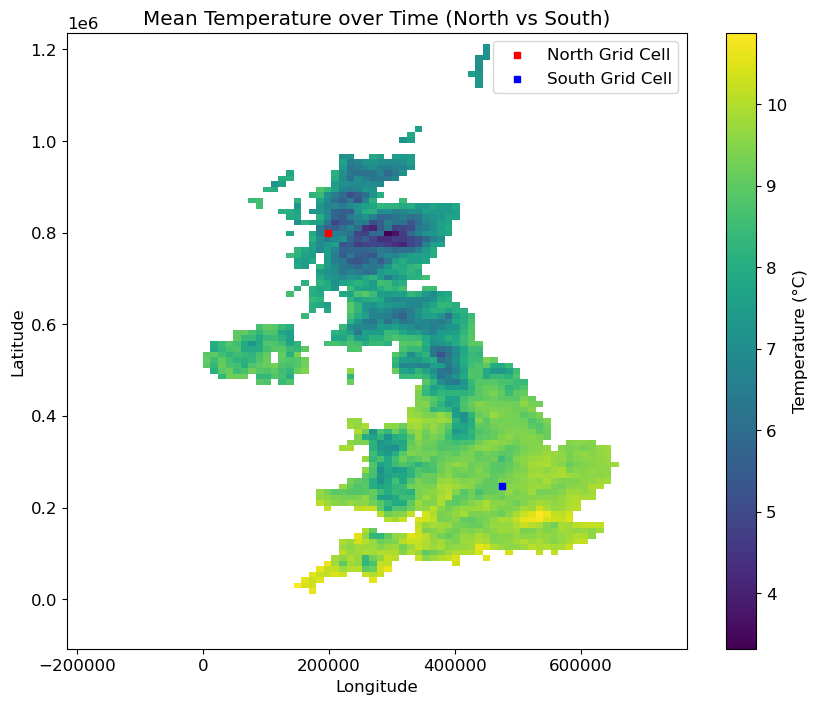

Average Linear Fit Pre-1990 Gradient (Slope): 0.004408
Average Linear Fit Pre-1990 Z-Score: 3.079947
Average Linear Fit Post-1990 Gradient (Slope): 0.023364
Average Linear Fit Post-1990 Z-Score: 2.418233
Average Linear Fit Total Gradient (Slope): 0.009747
Average Linear Fit Total Z-Score: 9.602481
NGC Linear Fit Pre-1990 Gradient (Slope): 0.004068
NGC Linear Fit Pre-1990 Z-Score: 2.761933
NGC Linear Fit Post-1990 Gradient (Slope): 0.029496
NGC Linear Fit Post-1990 Z-Score: 3.898462
NGC Linear Fit Total Gradient (Slope): 0.008647
NGC Linear Fit Total Z-Score: 8.505077
SGC Linear Fit Pre-1990 Gradient (Slope): 0.005343
SGC Linear Fit Pre-1990 Z-Score: 3.262925
SGC Linear Fit Post-1990 Gradient (Slope): 0.029405
SGC Linear Fit Post-1990 Z-Score: 2.457987
SGC Linear Fit Total Gradient (Slope): 0.012308
SGC Linear Fit Total Z-Score: 10.311113


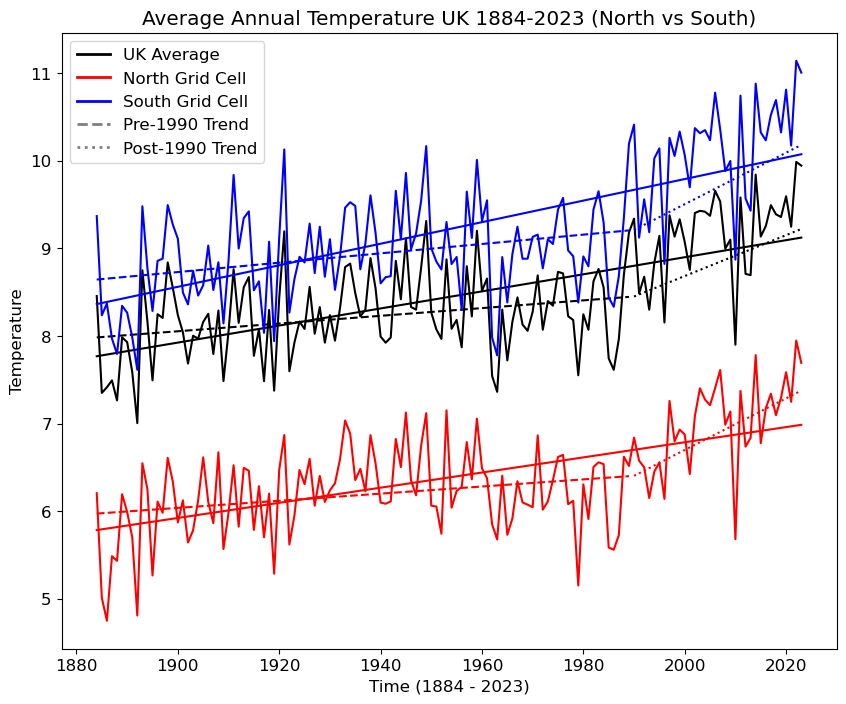

In [118]:
from matplotlib.lines import Line2D
target_lon = 200000
target_lat = 800000
target_lon2 = 470000
target_lat2 = 250000

mean_temp = np.mean(data_all_months, axis=0) #mean temperature for all grid cells

lons = data_temp.projection_x_coordinate.values #creates an array of longitudes and latitudes (x and y coords) contained in dataset
lats = data_temp.projection_y_coordinate.values #using data_temp because this is a single cd file so contains single value for grid coordinates

lon_mesh, lat_mesh = np.meshgrid(lons, lats) #creates the meshgrid of lons and lats which transforms the 2 1D arrays into 2D arrays so that there is a workable coordinaate system

selected_point1 = data_temp.sel(projection_x_coordinate=target_lon, #using .sel method to select the grid cell with coordinates closest to the inputted long and lat.
                               projection_y_coordinate=target_lat, #projection_x/y_coordinate is the variable in the dataset that contains the x and y coords usinig the BNG system
                               method='nearest')
selected_point2 = data_temp.sel(projection_x_coordinate=target_lon2, #adding second slected grid cell
                               projection_y_coordinate=target_lat2, 
                               method='nearest')

nearest_lon_idx = np.abs(lons - target_lon).argmin() #subtracts the inputted long/lat from every other value and creates an array of differnces between them, np.abs then takes the abs value of these and argmin returns the index of the grid cell witht the shortest distance from the target value
nearest_lat_idx = np.abs(lats - target_lat).argmin() #this is used because when selecting a grid cell for plotting later, it's easier to use the index
nearest_lon_idx2 = np.abs(lons - target_lon2).argmin()#adding second slected grid cell
nearest_lat_idx2 = np.abs(lats - target_lat2).argmin() 

print(f"Nearest index for longitude1: {nearest_lon_idx}") #checking which indicies have been selected
print(f"Nearest index for latitude1: {nearest_lat_idx}")
print(f"Nearest index for longitude2: {nearest_lon_idx2}") #adding second slected grid cell
print(f"Nearest index for latitude2: {nearest_lat_idx2}")

plt.figure(figsize=(10, 8))
plt.pcolormesh(lon_mesh, lat_mesh, mean_temp, cmap='viridis', shading='auto') #plots the meshgrid creaated previously with a colourbar etc
cbar = plt.colorbar()
cbar.set_label("Temperature (°C)")

plt.scatter(lon_mesh[nearest_lat_idx, nearest_lon_idx], #overlays the meshgrid plot with a scatter plot containing one point plotted at the coords of the targeted grid cell (marker set to square for aesthetic purposes to make it clearer we are selecting a crid cell, does not highlight the grid cell specifically)
            lat_mesh[nearest_lat_idx, nearest_lon_idx], #using the indices to select the correct coordinate from the 2D arrays
            color='red', s=25, marker='s', label='North Grid Cell')
plt.xlabel('Longitude') #labelling the plot, adding legend to signify the highlighted region is the selected grid cell
plt.ylabel('Latitude')
plt.title('Mean Temperature over Time (North vs South)')

plt.scatter(lon_mesh[nearest_lat_idx2, nearest_lon_idx2], #adding second slected grid cell
            lat_mesh[nearest_lat_idx2, nearest_lon_idx2], 
            color='blue', s=25, marker='s', label='South Grid Cell')

plt.legend()
plt.show()

#variables can be converted to numpy arrays
data_one_year = data.tas.values
data_all_months = data_temp.tas.values

#block reduce cuts the data into blocks and applies a function to each block (the function is the mean and the block size is 12 months)
temp = block_reduce(data_all_months[:,nearest_lat_idx, nearest_lon_idx], block_size=(12), func=np.mean, cval=np.mean(data_all_months))
temp2 = block_reduce(data_all_months[:,nearest_lat_idx2, nearest_lon_idx2], block_size=(12), func=np.mean, cval=np.mean(data_all_months)) #adding second slected grid cell
temp_all = block_reduce(data_all_months, block_size=(12,1,1), func=np.mean, cval=np.mean(data_all_months))#(12,1,1) means we group the time dimension into blocks of 12 months 91 year) but 1 (y) and 1 (x) means that we retain the spatial dimensions alreaady present in the data, i.e. there is no grouping of spatial data

#data is then averaged over the coordinate dimensions with nanmean being used to ignore NaN values
temp_mean2 = np.nanmean(temp_all, axis=(1, 2)) #temp_all has already created a grid of average temperatures in 12 month segments, so here i set axis=(1,2) so that the nanmean function acts only over the x 910 and y (2) dimensions and does not try to average again over time (0)
time = np.arange(1884,2024)

pre_1990_indices = time < 1990 #defining the numbers in time array that are below and abover 1990
post_1990_indices = time >= 1990

def plot_with_regression(time, data, color, label):
    plt.plot(time, data, color=color, label=label)

    time_pre1990 = time[pre_1990_indices] #creates array of time values using the indices generated by time < 1990
    data_pre1990 = data[pre_1990_indices] #same for post-1990
    N_pre1990 = len(time_pre1990) #number of datapoints
    coeffs_pre1990 = np.polyfit(time_pre1990, data_pre1990, 1) #fits a polynomial of degree 1 and returns the y intercept and slope
    slope_pre1990, intercept_pre1990 = coeffs_pre1990
    y_fit_pre1990 = np.polyval(coeffs_pre1990, time_pre1990) #evaluates the linear fit at specific values
    plt.plot(time_pre1990, y_fit_pre1990, color=color, linestyle='--') #plots data with linear fit

    residuals_pre1990 = data_pre1990 - y_fit_pre1990 #residuals
    s_err_pre1990 = np.sqrt(np.sum(residuals_pre1990**2) / (N_pre1990 - 2)) #standard error
    x_mean_pre1990 = np.mean(time_pre1990) #mean of data
    se_slope_pre1990 = s_err_pre1990 / np.sqrt(np.sum((time_pre1990 - x_mean_pre1990)**2)) #standard error of slope
    z_score_pre1990 = slope_pre1990 / se_slope_pre1990 #z-score
    print(f"{label} Pre-1990 Gradient (Slope): {slope_pre1990:.6f}")
    print(f"{label} Pre-1990 Z-Score: {z_score_pre1990:.6f}")

    #same for post 1990
    time_post1990 = time[post_1990_indices] 
    data_post1990 = data[post_1990_indices]
    N_post1990 = len(time_post1990)
    slope_post1990, intercept_post1990 = np.polyfit(time_post1990, data_post1990, 1)
    
    intercept_post1990 = coeffs_pre1990[0] * time_post1990[0] + coeffs_pre1990[1] - slope_post1990 * time_post1990[0] #ensuring the post 1990 fit connects to pre 1990
    y_fit_post1990 = slope_post1990 * time_post1990 + intercept_post1990
    plt.plot(time_post1990, y_fit_post1990, color=color, linestyle=':')

    residuals_post1990 = data_post1990 - y_fit_post1990 #z score calculations for post 1990
    s_err_post1990 = np.sqrt(np.sum(residuals_post1990**2) / (N_post1990 - 2))
    x_mean_post1990 = np.mean(time_post1990)
    se_slope_post1990 = s_err_post1990 / np.sqrt(np.sum((time_post1990 - x_mean_post1990)**2))
    z_score_post1990 = slope_post1990 / se_slope_post1990
    print(f"{label} Post-1990 Gradient (Slope): {slope_post1990:.6f}")
    print(f"{label} Post-1990 Z-Score: {z_score_post1990:.6f}")

    coeffs_total = np.polyfit(time, data, 1) #fitting entire dataset
    slope_total, intercept_total = coeffs_total
    y_fit_total = np.polyval(coeffs_total, time)
    plt.plot(time, y_fit_total, color=color, linestyle='-', linewidth=1.5)
    residuals_total = data - y_fit_total
    N_total = len(time)
    s_err_total = np.sqrt(np.sum(residuals_total**2) / (N_total - 2))
    x_mean_total = np.mean(time)
    se_slope_total = s_err_total / np.sqrt(np.sum((time - x_mean_total)**2))
    z_score_total = slope_total / se_slope_total
    print(f"{label} Total Gradient (Slope): {slope_total:.6f}")
    print(f"{label} Total Z-Score: {z_score_total:.6f}")

plt.figure(figsize=(10, 8)) #generates figure

plot_with_regression(time, temp_mean2, 'black', 'Average Linear Fit') #calling function for average and each selected grid cell
plot_with_regression(time, temp, 'r', 'NGC Linear Fit')
plot_with_regression(time, temp2, 'b', 'SGC Linear Fit')
plt.xlabel('Time (1884 - 2023)')
plt.ylabel('Temperature')
plt.title('Average Annual Temperature UK 1884-2023 (North vs South)')
plt.rcParams.update({'font.size': 12})


#better way of adding a legend
legend_elements = [
    Line2D([0], [0], color='black', lw=2, label='UK Average'),
    Line2D([0], [0], color='red', lw=2, label='North Grid Cell'),
    Line2D([0], [0], color='blue', lw=2, label='South Grid Cell'),
    
    Line2D([0], [0], color='gray', linestyle='--', lw=2, label='Pre-1990 Trend'),
    Line2D([0], [0], color='gray', linestyle=':', lw=2, label='Post-1990 Trend')
]
plt.legend(handles=legend_elements)
plt.show()

The following does the same analysis for coastal vs inland:

Nearest index for longitude1: 39
Nearest index for latitude1: 21
Nearest index for longitude2: 57
Nearest index for latitude2: 29


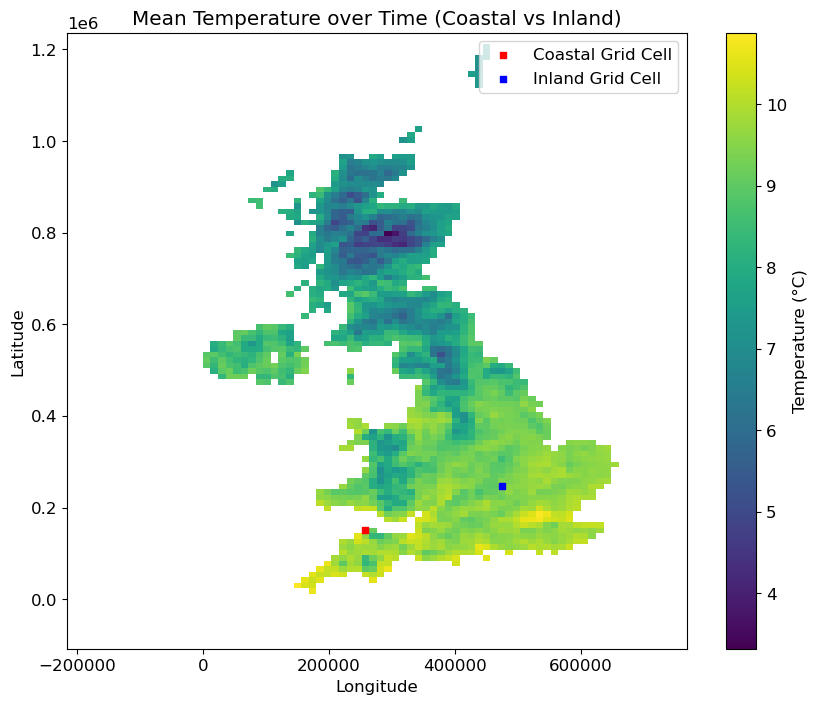

Average Linear Fit Pre-1990 Gradient (Slope): 0.004408
Average Linear Fit Pre-1990 Z-Score: 3.079947
Average Linear Fit Post-1990 Gradient (Slope): 0.023364
Average Linear Fit Post-1990 Z-Score: 2.406000
Average Linear Fit Total Gradient (Slope): 0.009747
CGC Linear Fit Pre-1990 Gradient (Slope): -0.004389
CGC Linear Fit Pre-1990 Z-Score: -2.955026
CGC Linear Fit Post-1990 Gradient (Slope): 0.026635
CGC Linear Fit Post-1990 Z-Score: 2.342072
CGC Linear Fit Total Gradient (Slope): 0.003605
IGC Linear Fit Pre-1990 Gradient (Slope): 0.005343
IGC Linear Fit Pre-1990 Z-Score: 3.262925
IGC Linear Fit Post-1990 Gradient (Slope): 0.029405
IGC Linear Fit Post-1990 Z-Score: 2.444814
IGC Linear Fit Total Gradient (Slope): 0.012308


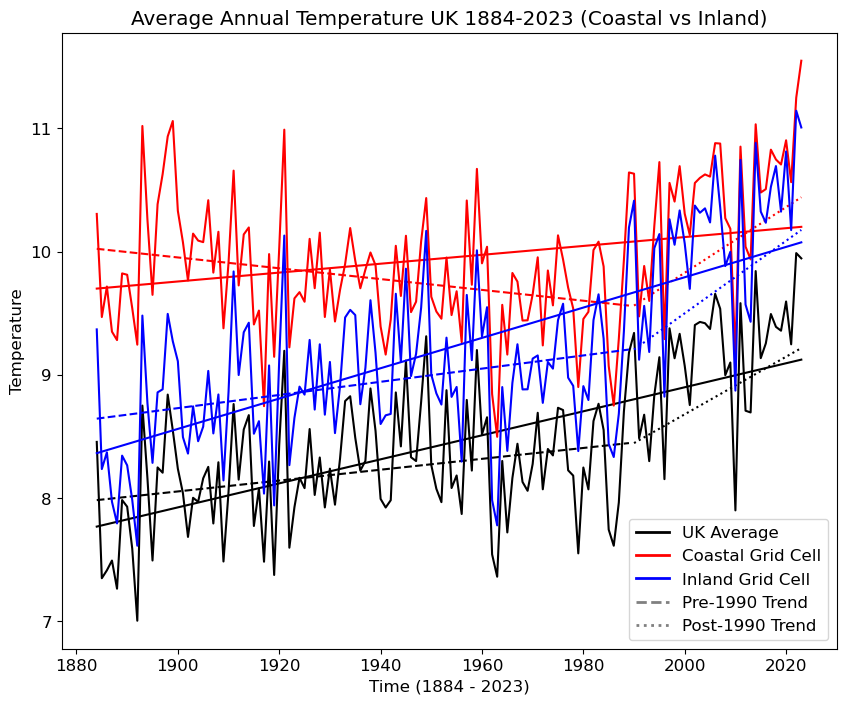

In [105]:
target_lon = 260000
target_lat = 150000
target_lon2 = 470000
target_lat2 = 250000

mean_temp = np.mean(data_all_months, axis=0) #mean temperature for all grid cells

lons = data_temp.projection_x_coordinate.values #creates an array of longitudes and latitudes (x and y coords) contained in dataset
lats = data_temp.projection_y_coordinate.values #using data_temp because this is a single cd file so contains single value for grid coordinates

lon_mesh, lat_mesh = np.meshgrid(lons, lats) #creates the meshgrid of lons and lats which transforms the 2 1D arrays into 2D arrays so that there is a workable coordinaate system

selected_point1 = data_temp.sel(projection_x_coordinate=target_lon, #using .sel method to select the grid cell with coordinates closest to the inputted long and lat.
                               projection_y_coordinate=target_lat, #projection_x/y_coordinate is the variable in the dataset that contains the x and y coords usinig the BNG system
                               method='nearest')
selected_point2 = data_temp.sel(projection_x_coordinate=target_lon2, #adding second slected grid cell
                               projection_y_coordinate=target_lat2, 
                               method='nearest')

nearest_lon_idx = np.abs(lons - target_lon).argmin() #subtracts the inputted long/lat from every other value and creates an array of differnces between them, np.abs then takes the abs value of these and argmin returns the index of the grid cell witht the shortest distance from the target value
nearest_lat_idx = np.abs(lats - target_lat).argmin() #this is used because when selecting a grid cell for plotting later, it's easier to use the index
nearest_lon_idx2 = np.abs(lons - target_lon2).argmin()#adding second slected grid cell
nearest_lat_idx2 = np.abs(lats - target_lat2).argmin() 

print(f"Nearest index for longitude1: {nearest_lon_idx}") #checking which indicies have been selected
print(f"Nearest index for latitude1: {nearest_lat_idx}")
print(f"Nearest index for longitude2: {nearest_lon_idx2}") #adding second slected grid cell
print(f"Nearest index for latitude2: {nearest_lat_idx2}")

plt.figure(figsize=(10, 8))
plt.pcolormesh(lon_mesh, lat_mesh, mean_temp, cmap='viridis', shading='auto') #plots the meshgrid creaated previously with a colourbar etc
cbar = plt.colorbar()
cbar.set_label("Temperature (°C)")

plt.scatter(lon_mesh[nearest_lat_idx, nearest_lon_idx], #overlays the meshgrid plot with a scatter plot containing one point plotted at the coords of the targeted grid cell (marker set to square for aesthetic purposes to make it clearer we are selecting a crid cell, does not highlight the grid cell specifically)
            lat_mesh[nearest_lat_idx, nearest_lon_idx], #using the indices to select the correct coordinate from the 2D arrays
            color='red', s=25, marker='s', label='Coastal Grid Cell')
plt.xlabel('Longitude') #labelling the plot, adding legend to signify the highlighted region is the selected grid cell
plt.ylabel('Latitude')
plt.title('Mean Temperature over Time (Coastal vs Inland)')

plt.scatter(lon_mesh[nearest_lat_idx2, nearest_lon_idx2], #adding second slected grid cell
            lat_mesh[nearest_lat_idx2, nearest_lon_idx2], 
            color='blue', s=25, marker='s', label='Inland Grid Cell')

plt.legend()
plt.show()

#variables can be converted to numpy arrays
data_one_year = data.tas.values
data_all_months = data_temp.tas.values

#block reduce cuts the data into blocks and applies a function to each block (the function is the mean and the block size is 12 months)
temp = block_reduce(data_all_months[:,nearest_lat_idx, nearest_lon_idx], block_size=(12), func=np.mean, cval=np.mean(data_all_months))
temp2 = block_reduce(data_all_months[:,nearest_lat_idx2, nearest_lon_idx2], block_size=(12), func=np.mean, cval=np.mean(data_all_months)) #adding second slected grid cell
temp_all = block_reduce(data_all_months, block_size=(12,1,1), func=np.mean, cval=np.mean(data_all_months))#(12,1,1) means we group the time dimension into blocks of 12 months 91 year) but 1 (y) and 1 (x) means that we retain the spatial dimensions alreaady present in the data, i.e. there is no grouping of spatial data

#data is then averaged over the coordinate dimensions with nanmean being used to ignore NaN values
temp_mean2 = np.nanmean(temp_all, axis=(1, 2)) #temp_all has already created a grid of average temperatures in 12 month segments, so here i set axis=(1,2) so that the nanmean function acts only over the x 910 and y (2) dimensions and does not try to average again over time (0)
time = np.arange(1884,2024)

plt.figure(figsize=(10, 8)) #generates figure

plot_with_regression(time, temp_mean2, 'black', 'Average Linear Fit') #calling function for average and each selected grid cell
plot_with_regression(time, temp, 'r', 'CGC Linear Fit')
plot_with_regression(time, temp2, 'b', 'IGC Linear Fit')
plt.xlabel('Time (1884 - 2023)')
plt.ylabel('Temperature')
plt.title('Average Annual Temperature UK 1884-2023 (Coastal vs Inland)')
plt.rcParams.update({'font.size': 12})


#better way of adding a legend
legend_elements = [
    Line2D([0], [0], color='black', lw=2, label='UK Average'),
    Line2D([0], [0], color='red', lw=2, label='Coastal Grid Cell'),
    Line2D([0], [0], color='blue', lw=2, label='Inland Grid Cell'),
    
    Line2D([0], [0], color='gray', linestyle='--', lw=2, label='Pre-1990 Trend'),
    Line2D([0], [0], color='gray', linestyle=':', lw=2, label='Post-1990 Trend')
]
plt.legend(handles=legend_elements)
plt.show()

North Average Pre-1990 Gradient (Slope): 0.003533
North Average Pre-1990 Z-Score: 2.547687
North Average Post-1990 Gradient (Slope): 0.020057
North Average Post-1990 Z-Score: 2.330470
North Average Total Gradient (Slope): 0.008039
North Average Total Z-Score: 8.392576
South Average Pre-1990 Gradient (Slope): 0.004901
South Average Pre-1990 Z-Score: 3.268068
South Average Post-1990 Gradient (Slope): 0.025102
South Average Post-1990 Z-Score: 2.413995
South Average Total Gradient (Slope): 0.010665
South Average Total Z-Score: 9.949821
UK Average Pre-1990 Gradient (Slope): 0.004408
UK Average Pre-1990 Z-Score: 3.079947
UK Average Post-1990 Gradient (Slope): 0.023364
UK Average Post-1990 Z-Score: 2.418233
UK Average Total Gradient (Slope): 0.009747
UK Average Total Z-Score: 9.602481


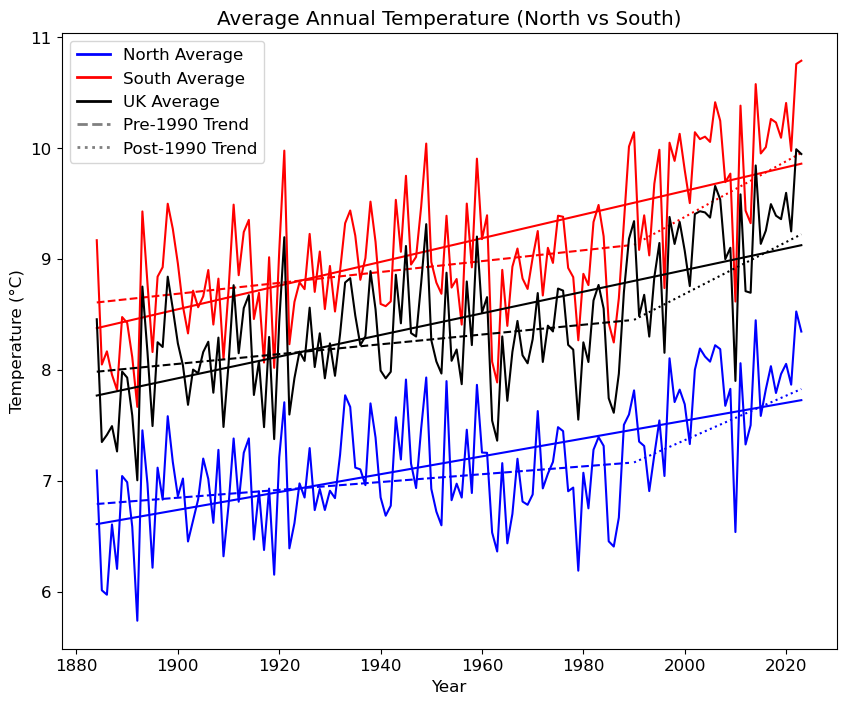

West Average Pre-1990 Gradient (Slope): 0.002900
West Average Pre-1990 Z-Score: 2.152844
West Average Post-1990 Gradient (Slope): 0.020589
West Average Post-1990 Z-Score: 2.471805
West Average Total Gradient (Slope): 0.007435
West Average Total Z-Score: 7.926750
East Average Pre-1990 Gradient (Slope): 0.005096
East Average Pre-1990 Z-Score: 3.416821
East Average Post-1990 Gradient (Slope): 0.024614
East Average Post-1990 Z-Score: 2.375202
East Average Total Gradient (Slope): 0.010794
East Average Total Z-Score: 10.154125
UK Average Pre-1990 Gradient (Slope): 0.004408
UK Average Pre-1990 Z-Score: 3.079947
UK Average Post-1990 Gradient (Slope): 0.023364
UK Average Post-1990 Z-Score: 2.418233
UK Average Total Gradient (Slope): 0.009747
UK Average Total Z-Score: 9.602481


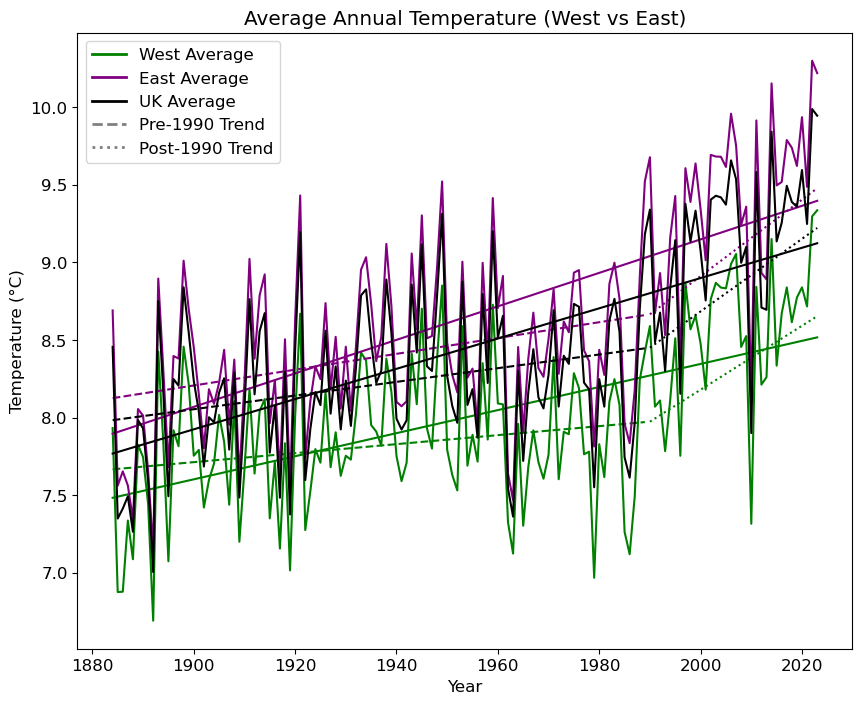

In [119]:
lat_midpoint = np.mean(lats) #getting midpoint of latitudes
north_indices = lats >= lat_midpoint #defining north and south indices
south_indices = lats < lat_midpoint

temp_north = data_temp.tas[:, north_indices, :].mean(dim=('projection_y_coordinate', 'projection_x_coordinate')) #monthly mean for north and south
temp_south = data_temp.tas[:, south_indices, :].mean(dim=('projection_y_coordinate', 'projection_x_coordinate')) #takes temp. values from N/S indices and then averages over the spatial dimension

lon_midpoint = np.mean(lons) #same for E and W
west_indices = lons <= lon_midpoint
east_indices = lons > lon_midpoint
temp_west = data_temp.tas[:, :, west_indices].mean(dim=('projection_y_coordinate', 'projection_x_coordinate'))
temp_east = data_temp.tas[:, :, east_indices].mean(dim=('projection_y_coordinate', 'projection_x_coordinate'))

temp_north_annual = block_reduce(temp_north.values, block_size=(12,), func=np.nanmean) #uses block reduce to average over annual periods (temporal dimension)
temp_south_annual = block_reduce(temp_south.values, block_size=(12,), func=np.nanmean)
temp_west_annual = block_reduce(temp_west.values, block_size=(12,), func=np.nanmean)
temp_east_annual = block_reduce(temp_east.values, block_size=(12,), func=np.nanmean)

plt.figure(figsize=(10, 8)) #plotting N/S
plot_with_regression(time, temp_north_annual, 'blue', 'North Average')
plot_with_regression(time, temp_south_annual, 'red', 'South Average')
plot_with_regression(time, temp_mean2, 'black', 'UK Average')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('Average Annual Temperature (North vs South)')
legend_elements = [
    Line2D([0], [0], color='blue', lw=2, label='North Average'),
    Line2D([0], [0], color='red', lw=2, label='South Average'),
    Line2D([0], [0], color='black', lw=2, label='UK Average'),
    Line2D([0], [0], color='gray', linestyle='--', lw=2, label='Pre-1990 Trend'),
    Line2D([0], [0], color='gray', linestyle=':', lw=2, label='Post-1990 Trend')
]
plt.legend(handles=legend_elements)
plt.show()

plt.figure(figsize=(10, 8)) #plotting E/W
plot_with_regression(time, temp_west_annual, 'green', 'West Average')
plot_with_regression(time, temp_east_annual, 'purple', 'East Average')
plot_with_regression(time, temp_mean2, 'black', 'UK Average')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('Average Annual Temperature (West vs East)')
legend_elements = [
    Line2D([0], [0], color='green', lw=2, label='West Average'),
    Line2D([0], [0], color='purple', lw=2, label='East Average'),
    Line2D([0], [0], color='black', lw=2, label='UK Average'),
    Line2D([0], [0], color='gray', linestyle='--', lw=2, label='Pre-1990 Trend'),
    Line2D([0], [0], color='gray', linestyle=':', lw=2, label='Post-1990 Trend')
]
plt.legend(handles=legend_elements)
plt.show()


The following allows for linear fit comparison between averages acorss the whole UK by month:

Average Pre-1990 Gradient (Slope): 0.004408
Average Pre-1990 Z-Score: 3.079947
Average Post-1990 Gradient (Slope): 0.023364
Average Post-1990 Z-Score: 2.406000
Average Total Gradient (Slope): 0.009747
Jan Pre-1990 Gradient (Slope): -0.000718
Jan Pre-1990 Z-Score: -0.146099
Jan Post-1990 Gradient (Slope): 0.003426
Jan Post-1990 Z-Score: 0.130167
Jan Total Gradient (Slope): 0.007600
Jul Pre-1990 Gradient (Slope): 0.003754
Jul Pre-1990 Z-Score: 1.195113
Jul Post-1990 Gradient (Slope): 0.022176
Jul Post-1990 Z-Score: 1.139375
Jul Total Gradient (Slope): 0.009524


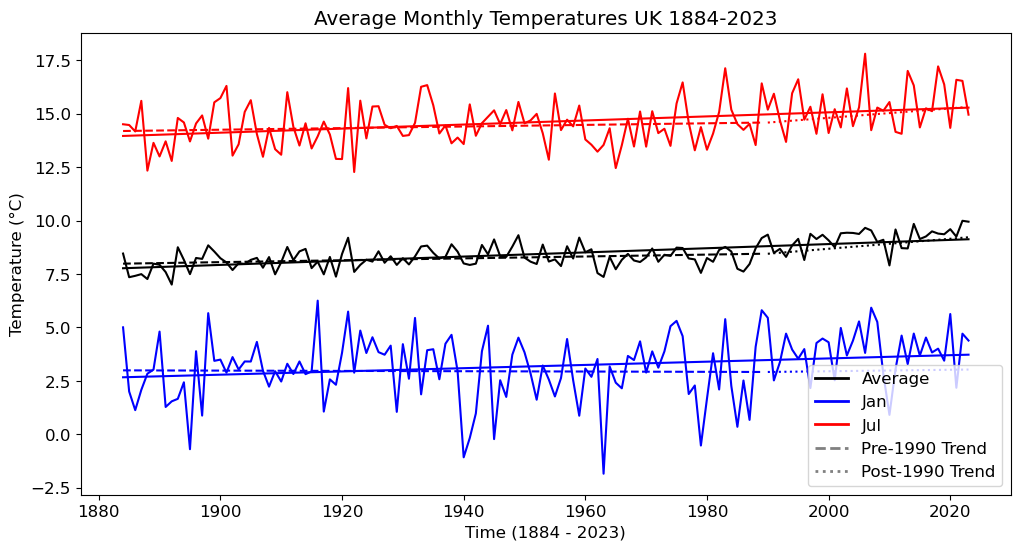

In [106]:

plt.figure(figsize=(12, 6))

plot_with_regression(time, temp_mean, 'black', 'Average') #linear fit for average temperature

plot_with_regression(time, temp_mean_jan, 'blue', 'Jan') #linear fit for january temperature

plot_with_regression(time, temp_mean_jul, 'red', 'Jul') #linear fit for february temperature

plt.xlabel('Time (1884 - 2023)')
plt.ylabel('Temperature (°C)')
plt.title('Average Monthly Temperatures UK 1884-2023')
plt.rcParams.update({'font.size': 12})

legend_elements = [
    Line2D([0], [0], color='black', lw=2, label='Average'),
    Line2D([0], [0], color='blue', lw=2, label='Jan'),
    Line2D([0], [0], color='red', lw=2, label='Jul'),
    
    Line2D([0], [0], color='gray', linestyle='--', lw=2, label='Pre-1990 Trend'),
    Line2D([0], [0], color='gray', linestyle=':', lw=2, label='Post-1990 Trend')
]
plt.legend(handles=legend_elements)
plt.show()


Now doing the same for rain:

Average Pre-1990 Gradient (Slope): 0.049893
Average Pre-1990 Z-Score: 3.080494
Average Post-1990 Gradient (Slope): 0.149611
Average Post-1990 Z-Score: 0.792813
Average Total Gradient (Slope): 0.072706
Jan Pre-1990 Gradient (Slope): 0.128562
Jan Pre-1990 Z-Score: 2.087851
Jan Post-1990 Gradient (Slope): -0.361614
Jan Post-1990 Z-Score: -0.458683
Jan Total Gradient (Slope): 0.157414
Jul Pre-1990 Gradient (Slope): -0.064788
Jul Pre-1990 Z-Score: -1.305961
Jul Post-1990 Gradient (Slope): 0.837457
Jul Post-1990 Z-Score: 1.678199
Jul Total Gradient (Slope): -0.039334


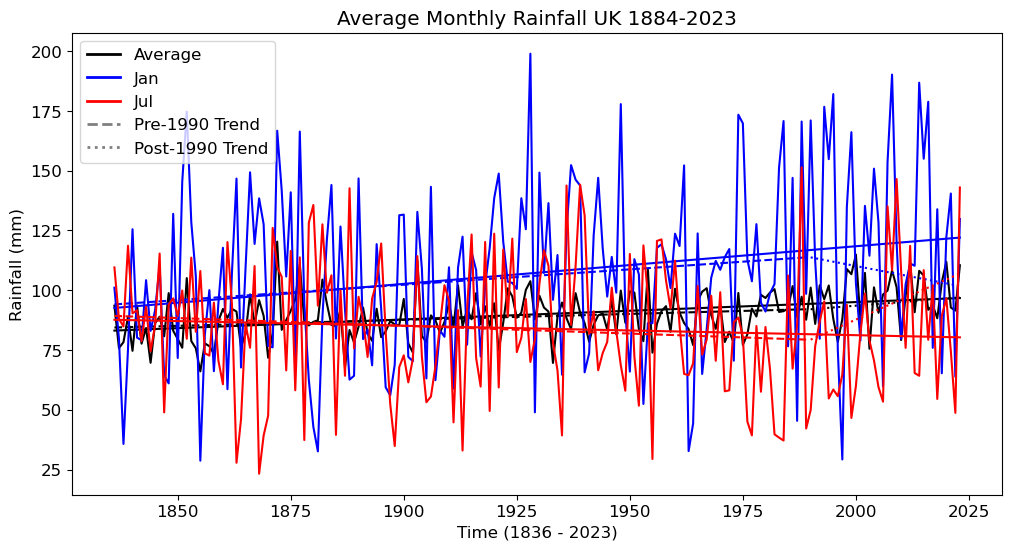

In [107]:
#Opening a single netCDF file
data = xr.open_dataset(r"/Users/maxMax/Desktop/Datasets/12km/rainfall/mon/v20240514/rainfall_hadukgrid_uk_12km_mon_183601-183612.nc")

#Opening all the netCDF files in a directory and merging them into one variable - must use /*.cd after folder name to extract all netCDF files in folder.
data_rain = xr.open_mfdataset(r"/Users/maxMax/Desktop/Datasets/12km/rainfall/mon/v20240514/*.nc", parallel=False) #Always set parallel to False when using open_mfdataset. There is a bug in the package.

data_one_year = data.rainfall.values
data_all_months = data_rain.rainfall.values

time_index = pd.to_datetime(data_rain.time.values) #converting the time coords into a panda datatframe so that they're easy to filter
rain = block_reduce(data_all_months, block_size=(12,1,1), func=np.mean, cval=np.mean(data_all_months))

jan_data = data_rain.sel(time=time_index.month == 1)
feb_data = data_rain.sel(time=time_index.month == 2)
mar_data = data_rain.sel(time=time_index.month == 3)
apr_data = data_rain.sel(time=time_index.month == 4)
may_data = data_rain.sel(time=time_index.month == 5)
jun_data = data_rain.sel(time=time_index.month == 6)
jul_data = data_rain.sel(time=time_index.month == 7)
aug_data = data_rain.sel(time=time_index.month == 8)
sep_data = data_rain.sel(time=time_index.month == 9)
oct_data = data_rain.sel(time=time_index.month == 10)
nov_data = data_rain.sel(time=time_index.month == 11)
dec_data = data_rain.sel(time=time_index.month == 12)

rain_jan = jan_data.rainfall.values
rain_feb = feb_data.rainfall.values
rain_mar = mar_data.rainfall.values
rain_apr = apr_data.rainfall.values
rain_may = may_data.rainfall.values
rain_jun = jun_data.rainfall.values
rain_jul = jul_data.rainfall.values
rain_aug = aug_data.rainfall.values
rain_sep = sep_data.rainfall.values
rain_oct = oct_data.rainfall.values
rain_nov = nov_data.rainfall.values
rain_dec = dec_data.rainfall.values

rain_mean = np.nanmean(rain, axis=(1, 2))
rain_mean_jan = np.nanmean(rain_jan, axis=(1, 2))
rain_mean_feb = np.nanmean(rain_feb, axis=(1, 2))
rain_mean_mar = np.nanmean(rain_mar, axis=(1, 2))
rain_mean_apr = np.nanmean(rain_apr, axis=(1, 2))
rain_mean_may = np.nanmean(rain_may, axis=(1, 2))
rain_mean_jun = np.nanmean(rain_jun, axis=(1, 2))
rain_mean_jul = np.nanmean(rain_jul, axis=(1, 2))
rain_mean_aug = np.nanmean(rain_aug, axis=(1, 2))
rain_mean_sep = np.nanmean(rain_sep, axis=(1, 2))
rain_mean_oct = np.nanmean(rain_oct, axis=(1, 2))
rain_mean_nov = np.nanmean(rain_nov, axis=(1, 2))
rain_mean_dec = np.nanmean(rain_dec, axis=(1, 2))

time = np.arange(1836,2024)

pre_1990_indices = time < 1990 #defining the numbers in time array that are below and abover 1990
post_1990_indices = time >= 1990

plt.figure(figsize=(12, 6))

plot_with_regression(time, rain_mean, 'black', 'Average') #linear fit for average rainfall

plot_with_regression(time, rain_mean_jan, 'blue', 'Jan') #linear fit for january rainfall

plot_with_regression(time, rain_mean_jul, 'red', 'Jul') #linear fit for february rainfall

plt.xlabel('Time (1836 - 2023)')
plt.ylabel('Rainfall (mm)')
plt.title('Average Monthly Rainfall UK 1884-2023')
plt.rcParams.update({'font.size': 12})

legend_elements = [
    Line2D([0], [0], color='black', lw=2, label='Average'),
    Line2D([0], [0], color='blue', lw=2, label='Jan'),
    Line2D([0], [0], color='red', lw=2, label='Jul'),
    
    Line2D([0], [0], color='gray', linestyle='--', lw=2, label='Pre-1990 Trend'),
    Line2D([0], [0], color='gray', linestyle=':', lw=2, label='Post-1990 Trend')
]
plt.legend(handles=legend_elements)
plt.show()

Nearest index for longitude1: 34
Nearest index for latitude1: 75
Nearest index for longitude2: 57
Nearest index for latitude2: 29


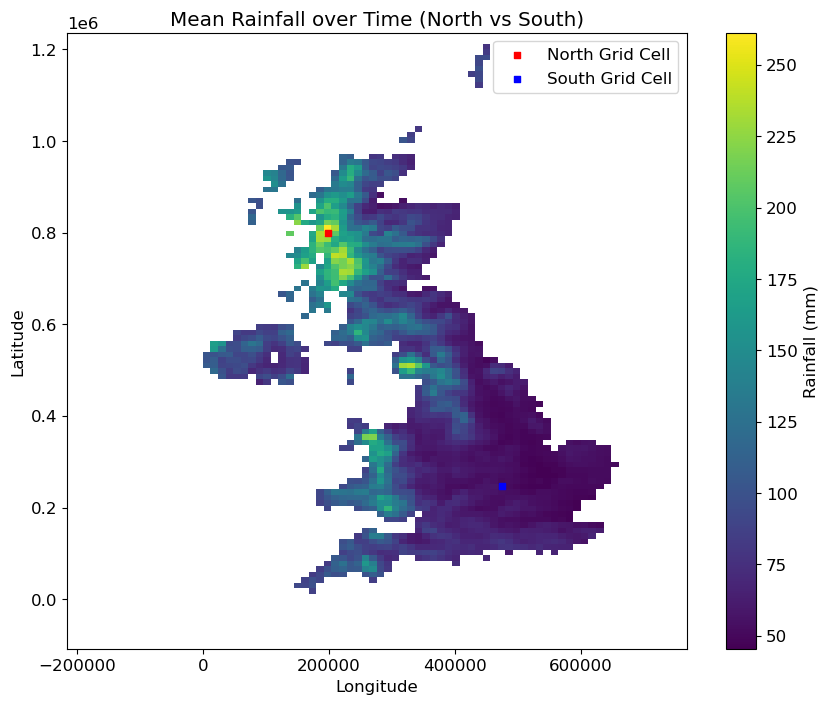

Average Linear Fit Pre-1990 Gradient (Slope): 0.049893
Average Linear Fit Pre-1990 Z-Score: 3.080494
Average Linear Fit Post-1990 Gradient (Slope): 0.149611
Average Linear Fit Post-1990 Z-Score: 0.792813
Average Linear Fit Total Gradient (Slope): 0.072706
NGC Linear Fit Pre-1990 Gradient (Slope): 0.309236
NGC Linear Fit Pre-1990 Z-Score: 4.392022
NGC Linear Fit Post-1990 Gradient (Slope): -0.823072
NGC Linear Fit Post-1990 Z-Score: -0.839966
NGC Linear Fit Total Gradient (Slope): 0.351418
SGC Linear Fit Pre-1990 Gradient (Slope): 0.020755
SGC Linear Fit Pre-1990 Z-Score: 1.298716
SGC Linear Fit Post-1990 Gradient (Slope): 0.075856
SGC Linear Fit Post-1990 Z-Score: 0.407734
SGC Linear Fit Total Gradient (Slope): 0.023849


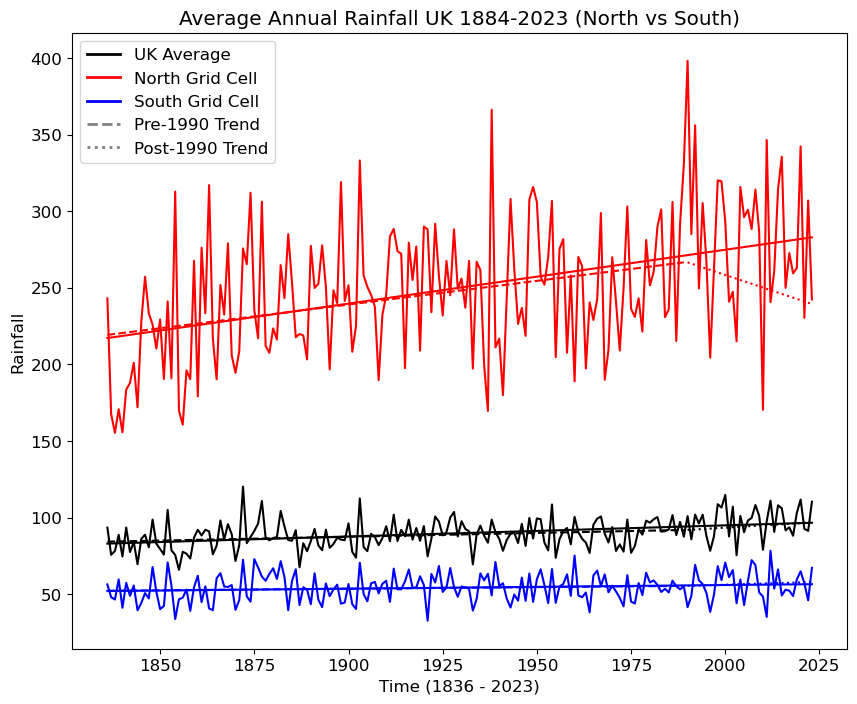

In [108]:
from matplotlib.lines import Line2D
target_lon = 200000
target_lat = 800000
target_lon2 = 470000
target_lat2 = 250000

mean_rain = np.mean(data_all_months, axis=0) #mean rainfall for all grid cells

lons = data_rain.projection_x_coordinate.values #creates an array of longitudes and latitudes (x and y coords) contained in dataset
lats = data_rain.projection_y_coordinate.values #using data_temp because this is a single cd file so contains single value for grid coordinates

lon_mesh, lat_mesh = np.meshgrid(lons, lats) #creates the meshgrid of lons and lats which transforms the 2 1D arrays into 2D arrays so that there is a workable coordinaate system

selected_point1 = data_temp.sel(projection_x_coordinate=target_lon, #using .sel method to select the grid cell with coordinates closest to the inputted long and lat.
                               projection_y_coordinate=target_lat, #projection_x/y_coordinate is the variable in the dataset that contains the x and y coords usinig the BNG system
                               method='nearest')
selected_point2 = data_temp.sel(projection_x_coordinate=target_lon2, #adding second slected grid cell
                               projection_y_coordinate=target_lat2, 
                               method='nearest')

nearest_lon_idx = np.abs(lons - target_lon).argmin() #subtracts the inputted long/lat from every other value and creates an array of differnces between them, np.abs then takes the abs value of these and argmin returns the index of the grid cell witht the shortest distance from the target value
nearest_lat_idx = np.abs(lats - target_lat).argmin() #this is used because when selecting a grid cell for plotting later, it's easier to use the index
nearest_lon_idx2 = np.abs(lons - target_lon2).argmin()#adding second slected grid cell
nearest_lat_idx2 = np.abs(lats - target_lat2).argmin() 

print(f"Nearest index for longitude1: {nearest_lon_idx}") #checking which indicies have been selected
print(f"Nearest index for latitude1: {nearest_lat_idx}")
print(f"Nearest index for longitude2: {nearest_lon_idx2}") #adding second slected grid cell
print(f"Nearest index for latitude2: {nearest_lat_idx2}")

plt.figure(figsize=(10, 8))
plt.pcolormesh(lon_mesh, lat_mesh, mean_rain, cmap='viridis', shading='auto') #plots the meshgrid creaated previously with a colourbar etc
cbar = plt.colorbar()
cbar.set_label("Rainfall (mm)")

plt.scatter(lon_mesh[nearest_lat_idx, nearest_lon_idx], #overlays the meshgrid plot with a scatter plot containing one point plotted at the coords of the targeted grid cell (marker set to square for aesthetic purposes to make it clearer we are selecting a crid cell, does not highlight the grid cell specifically)
            lat_mesh[nearest_lat_idx, nearest_lon_idx], #using the indices to select the correct coordinate from the 2D arrays
            color='red', s=25, marker='s', label='North Grid Cell')
plt.xlabel('Longitude') #labelling the plot, adding legend to signify the highlighted region is the selected grid cell
plt.ylabel('Latitude')
plt.title('Mean Rainfall over Time (North vs South)')

plt.scatter(lon_mesh[nearest_lat_idx2, nearest_lon_idx2], #adding second slected grid cell
            lat_mesh[nearest_lat_idx2, nearest_lon_idx2], 
            color='blue', s=25, marker='s', label='South Grid Cell')

plt.legend()
plt.show()

#block reduce cuts the data into blocks and applies a function to each block (the function is the mean and the block size is 12 months)
rain = block_reduce(data_all_months[:,nearest_lat_idx, nearest_lon_idx], block_size=(12), func=np.mean, cval=np.mean(data_all_months))
rain2 = block_reduce(data_all_months[:,nearest_lat_idx2, nearest_lon_idx2], block_size=(12), func=np.mean, cval=np.mean(data_all_months)) #adding second slected grid cell
rain_all = block_reduce(data_all_months, block_size=(12,1,1), func=np.mean, cval=np.mean(data_all_months))#(12,1,1) means we group the time dimension into blocks of 12 months 91 year) but 1 (y) and 1 (x) means that we retain the spatial dimensions alreaady present in the data, i.e. there is no grouping of spatial data

#data is then averaged over the coordinate dimensions with nanmean being used to ignore NaN values
rain_mean2 = np.nanmean(rain_all, axis=(1, 2)) #rain_all has already created a grid of average rainfall in 12 month segments, so here i set axis=(1,2) so that the nanmean function acts only over the x 910 and y (2) dimensions and does not try to average again over time (0)
time = np.arange(1836,2024)

pre_1990_indices = time < 1990 #defining the numbers in time array that are below and abover 1990
post_1990_indices = time >= 1990

plt.figure(figsize=(10, 8)) #generates figure

plot_with_regression(time, rain_mean2, 'black', 'Average Linear Fit') #calling function for average and each selected grid cell
plot_with_regression(time, rain, 'r', 'NGC Linear Fit')
plot_with_regression(time, rain2, 'b', 'SGC Linear Fit')
plt.xlabel('Time (1836 - 2023)')
plt.ylabel('Rainfall')
plt.title('Average Annual Rainfall UK 1884-2023 (North vs South)')
plt.rcParams.update({'font.size': 12})


#better way of adding a legend
legend_elements = [
    Line2D([0], [0], color='black', lw=2, label='UK Average'),
    Line2D([0], [0], color='red', lw=2, label='North Grid Cell'),
    Line2D([0], [0], color='blue', lw=2, label='South Grid Cell'),
    
    Line2D([0], [0], color='gray', linestyle='--', lw=2, label='Pre-1990 Trend'),
    Line2D([0], [0], color='gray', linestyle=':', lw=2, label='Post-1990 Trend')
]
plt.legend(handles=legend_elements)
plt.show()

Following represents differences in coast vs inland for rainfall:

Nearest index for longitude1: 39
Nearest index for latitude1: 21
Nearest index for longitude2: 57
Nearest index for latitude2: 29


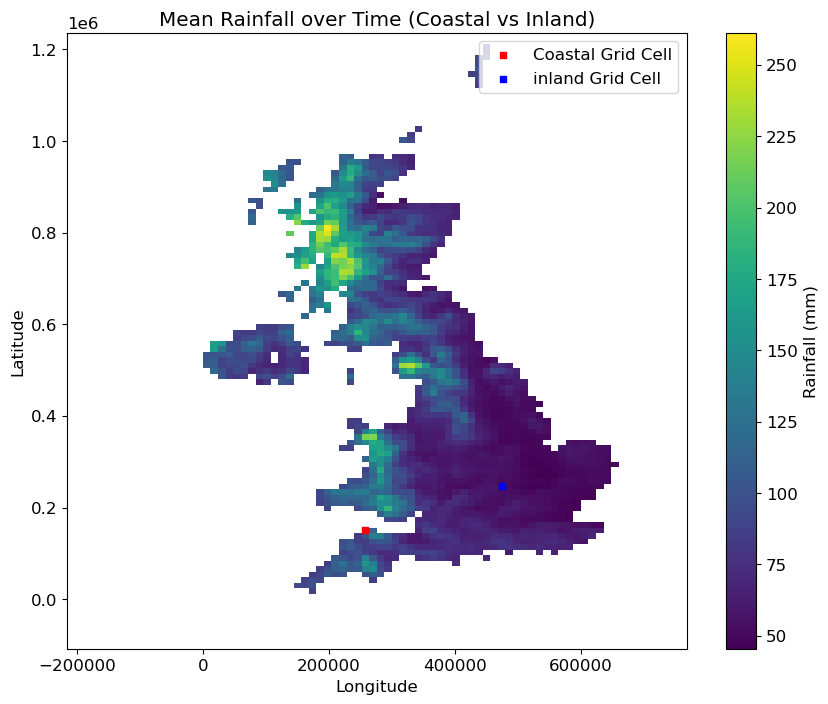

Average Linear Fit Pre-1990 Gradient (Slope): 0.049893
Average Linear Fit Pre-1990 Z-Score: 3.080494
Average Linear Fit Post-1990 Gradient (Slope): 0.149611
Average Linear Fit Post-1990 Z-Score: 0.792813
Average Linear Fit Total Gradient (Slope): 0.072706
CGC Linear Fit Pre-1990 Gradient (Slope): 0.088691
CGC Linear Fit Pre-1990 Z-Score: 3.619021
CGC Linear Fit Post-1990 Gradient (Slope): 0.253003
CGC Linear Fit Post-1990 Z-Score: 0.861743
CGC Linear Fit Total Gradient (Slope): 0.111087
IGC Linear Fit Pre-1990 Gradient (Slope): 0.020755
IGC Linear Fit Pre-1990 Z-Score: 1.298716
IGC Linear Fit Post-1990 Gradient (Slope): 0.075856
IGC Linear Fit Post-1990 Z-Score: 0.407734
IGC Linear Fit Total Gradient (Slope): 0.023849


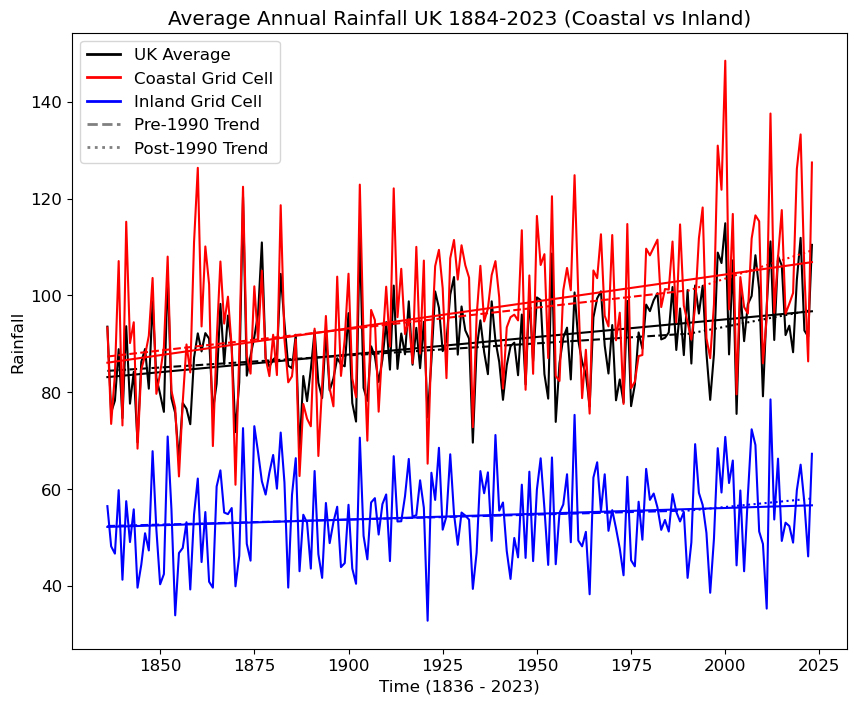

In [109]:
target_lon = 260000
target_lat = 150000
target_lon2 = 470000
target_lat2 = 250000

mean_rain = np.mean(data_all_months, axis=0) #mean rainfall for all grid cells

lons = data_rain.projection_x_coordinate.values #creates an array of longitudes and latitudes (x and y coords) contained in dataset
lats = data_rain.projection_y_coordinate.values #using data_temp because this is a single cd file so contains single value for grid coordinates

lon_mesh, lat_mesh = np.meshgrid(lons, lats) #creates the meshgrid of lons and lats which transforms the 2 1D arrays into 2D arrays so that there is a workable coordinaate system

selected_point1 = data_temp.sel(projection_x_coordinate=target_lon, #using .sel method to select the grid cell with coordinates closest to the inputted long and lat.
                               projection_y_coordinate=target_lat, #projection_x/y_coordinate is the variable in the dataset that contains the x and y coords usinig the BNG system
                               method='nearest')
selected_point2 = data_temp.sel(projection_x_coordinate=target_lon2, #adding second slected grid cell
                               projection_y_coordinate=target_lat2, 
                               method='nearest')

nearest_lon_idx = np.abs(lons - target_lon).argmin() #subtracts the inputted long/lat from every other value and creates an array of differnces between them, np.abs then takes the abs value of these and argmin returns the index of the grid cell witht the shortest distance from the target value
nearest_lat_idx = np.abs(lats - target_lat).argmin() #this is used because when selecting a grid cell for plotting later, it's easier to use the index
nearest_lon_idx2 = np.abs(lons - target_lon2).argmin()#adding second slected grid cell
nearest_lat_idx2 = np.abs(lats - target_lat2).argmin() 

print(f"Nearest index for longitude1: {nearest_lon_idx}") #checking which indicies have been selected
print(f"Nearest index for latitude1: {nearest_lat_idx}")
print(f"Nearest index for longitude2: {nearest_lon_idx2}") #adding second slected grid cell
print(f"Nearest index for latitude2: {nearest_lat_idx2}")

plt.figure(figsize=(10, 8))
plt.pcolormesh(lon_mesh, lat_mesh, mean_rain, cmap='viridis', shading='auto') #plots the meshgrid creaated previously with a colourbar etc
cbar = plt.colorbar()
cbar.set_label("Rainfall (mm)")

plt.scatter(lon_mesh[nearest_lat_idx, nearest_lon_idx], #overlays the meshgrid plot with a scatter plot containing one point plotted at the coords of the targeted grid cell (marker set to square for aesthetic purposes to make it clearer we are selecting a crid cell, does not highlight the grid cell specifically)
            lat_mesh[nearest_lat_idx, nearest_lon_idx], #using the indices to select the correct coordinate from the 2D arrays
            color='red', s=25, marker='s', label='Coastal Grid Cell')
plt.xlabel('Longitude') #labelling the plot, adding legend to signify the highlighted region is the selected grid cell
plt.ylabel('Latitude')
plt.title('Mean Rainfall over Time (Coastal vs Inland)')

plt.scatter(lon_mesh[nearest_lat_idx2, nearest_lon_idx2], #adding second slected grid cell
            lat_mesh[nearest_lat_idx2, nearest_lon_idx2], 
            color='blue', s=25, marker='s', label='inland Grid Cell')

plt.legend()
plt.show()

#block reduce cuts the data into blocks and applies a function to each block (the function is the mean and the block size is 12 months)
rain = block_reduce(data_all_months[:,nearest_lat_idx, nearest_lon_idx], block_size=(12), func=np.mean, cval=np.mean(data_all_months))
rain2 = block_reduce(data_all_months[:,nearest_lat_idx2, nearest_lon_idx2], block_size=(12), func=np.mean, cval=np.mean(data_all_months)) #adding second slected grid cell
rain_all = block_reduce(data_all_months, block_size=(12,1,1), func=np.mean, cval=np.mean(data_all_months))#(12,1,1) means we group the time dimension into blocks of 12 months 91 year) but 1 (y) and 1 (x) means that we retain the spatial dimensions alreaady present in the data, i.e. there is no grouping of spatial data

#data is then averaged over the coordinate dimensions with nanmean being used to ignore NaN values
rain_mean2 = np.nanmean(rain_all, axis=(1, 2)) #rain_all has already created a grid of average rainfall in 12 month segments, so here i set axis=(1,2) so that the nanmean function acts only over the x 910 and y (2) dimensions and does not try to average again over time (0)
time = np.arange(1836,2024)

pre_1990_indices = time < 1990 #defining the numbers in time array that are below and abover 1990
post_1990_indices = time >= 1990

plt.figure(figsize=(10, 8)) #generates figure

plot_with_regression(time, rain_mean2, 'black', 'Average Linear Fit') #calling function for average and each selected grid cell
plot_with_regression(time, rain, 'r', 'CGC Linear Fit')
plot_with_regression(time, rain2, 'b', 'IGC Linear Fit')
plt.xlabel('Time (1836 - 2023)')
plt.ylabel('Rainfall')
plt.title('Average Annual Rainfall UK 1884-2023 (Coastal vs Inland)')
plt.rcParams.update({'font.size': 12})


#better way of adding a legend
legend_elements = [
    Line2D([0], [0], color='black', lw=2, label='UK Average'),
    Line2D([0], [0], color='red', lw=2, label='Coastal Grid Cell'),
    Line2D([0], [0], color='blue', lw=2, label='Inland Grid Cell'),
    
    Line2D([0], [0], color='gray', linestyle='--', lw=2, label='Pre-1990 Trend'),
    Line2D([0], [0], color='gray', linestyle=':', lw=2, label='Post-1990 Trend')
]
plt.legend(handles=legend_elements)
plt.show()

North Rainfall Average Pre-1990 Gradient (Slope): 0.087158
North Rainfall Average Pre-1990 Z-Score: 4.107387
North Rainfall Average Post-1990 Gradient (Slope): 0.007280
North Rainfall Average Post-1990 Z-Score: 0.023618
North Rainfall Average Total Gradient (Slope): 0.127097
North Rainfall Average Total Z-Score: 7.621304
South Rainfall Average Pre-1990 Gradient (Slope): 0.030311
South Rainfall Average Pre-1990 Z-Score: 1.816446
South Rainfall Average Post-1990 Gradient (Slope): 0.224402
South Rainfall Average Post-1990 Z-Score: 1.248817
South Rainfall Average Total Gradient (Slope): 0.044125
South Rainfall Average Total Z-Score: 3.489170
UK Rainfall Average Pre-1990 Gradient (Slope): 0.049893
UK Rainfall Average Pre-1990 Z-Score: 3.080494
UK Rainfall Average Post-1990 Gradient (Slope): 0.149611
UK Rainfall Average Post-1990 Z-Score: 0.793926
UK Rainfall Average Total Gradient (Slope): 0.072706
UK Rainfall Average Total Z-Score: 5.852226


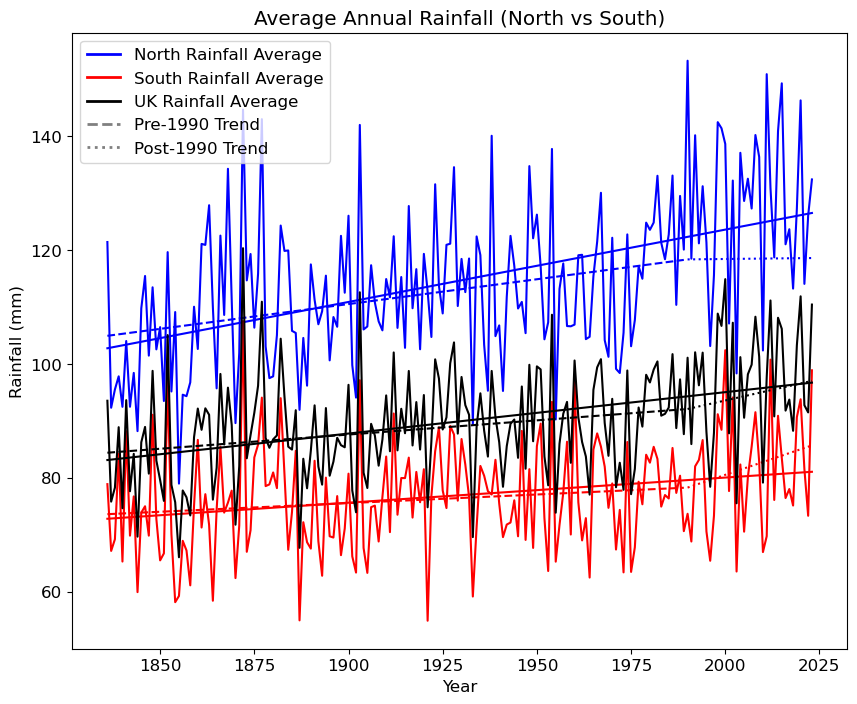

West Rainfall Average Pre-1990 Gradient (Slope): 0.111865
West Rainfall Average Pre-1990 Z-Score: 4.853023
West Rainfall Average Post-1990 Gradient (Slope): 0.018067
West Rainfall Average Post-1990 Z-Score: 0.056821
West Rainfall Average Total Gradient (Slope): 0.147142
West Rainfall Average Total Z-Score: 8.186177
East Rainfall Average Pre-1990 Gradient (Slope): 0.021987
East Rainfall Average Pre-1990 Z-Score: 1.424180
East Rainfall Average Post-1990 Gradient (Slope): 0.208845
East Rainfall Average Post-1990 Z-Score: 1.249509
East Rainfall Average Total Gradient (Slope): 0.039188
East Rainfall Average Total Z-Score: 3.334896
UK Rainfall Average Pre-1990 Gradient (Slope): 0.049893
UK Rainfall Average Pre-1990 Z-Score: 3.080494
UK Rainfall Average Post-1990 Gradient (Slope): 0.149611
UK Rainfall Average Post-1990 Z-Score: 0.793926
UK Rainfall Average Total Gradient (Slope): 0.072706
UK Rainfall Average Total Z-Score: 5.852226


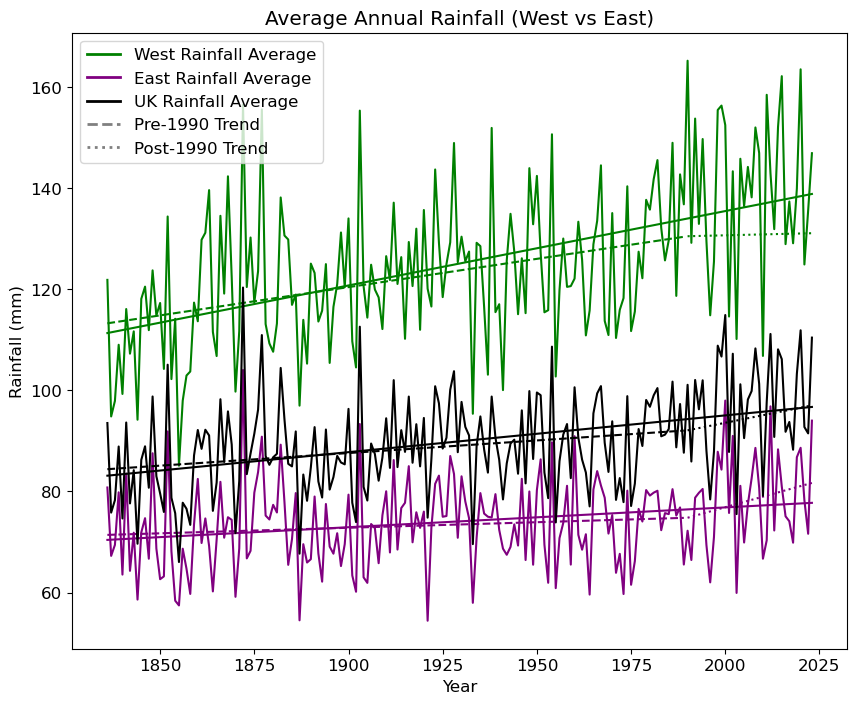

In [121]:

#same code as before but for rainfall data:
data_rain = xr.open_mfdataset(r"/Users/maxMax/Desktop/Datasets/12km/rainfall/mon/v20240514/*.nc", parallel=False)

lons = data_rain.projection_x_coordinate.values
lats = data_rain.projection_y_coordinate.values

lat_midpoint = np.mean(lats)
north_indices = lats >= lat_midpoint
south_indices = lats < lat_midpoint

rain_north = data_rain.rainfall[:, north_indices, :].mean(dim=('projection_y_coordinate', 'projection_x_coordinate'))
rain_south = data_rain.rainfall[:, south_indices, :].mean(dim=('projection_y_coordinate', 'projection_x_coordinate'))

lon_midpoint = np.mean(lons)
west_indices = lons <= lon_midpoint
east_indices = lons > lon_midpoint

rain_west = data_rain.rainfall[:, :, west_indices].mean(dim=('projection_y_coordinate', 'projection_x_coordinate'))
rain_east = data_rain.rainfall[:, :, east_indices].mean(dim=('projection_y_coordinate', 'projection_x_coordinate'))

rain_uk = data_rain.rainfall.mean(dim=('projection_y_coordinate', 'projection_x_coordinate'))

rain_north_annual = block_reduce(rain_north.values, block_size=(12,), func=np.nanmean)
rain_south_annual = block_reduce(rain_south.values, block_size=(12,), func=np.nanmean)
rain_west_annual = block_reduce(rain_west.values, block_size=(12,), func=np.nanmean)
rain_east_annual = block_reduce(rain_east.values, block_size=(12,), func=np.nanmean)
rain_uk_annual = block_reduce(rain_uk.values, block_size=(12,), func=np.nanmean)


plt.figure(figsize=(10, 8)) #north vs south
plot_with_regression(time, rain_north_annual, 'blue', 'North Rainfall Average')
plot_with_regression(time, rain_south_annual, 'red', 'South Rainfall Average')
plot_with_regression(time, rain_uk_annual, 'black', 'UK Rainfall Average')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.title('Average Annual Rainfall (North vs South)')
legend_elements = [
    Line2D([0], [0], color='blue', lw=2, label='North Rainfall Average'),
    Line2D([0], [0], color='red', lw=2, label='South Rainfall Average'),
    Line2D([0], [0], color='black', lw=2, label='UK Rainfall Average'),
    Line2D([0], [0], color='gray', linestyle='--', lw=2, label='Pre-1990 Trend'),
    Line2D([0], [0], color='gray', linestyle=':', lw=2, label='Post-1990 Trend')
]
plt.legend(handles=legend_elements)
plt.show()

plt.figure(figsize=(10, 8)) #west vs east
plot_with_regression(time, rain_west_annual, 'green', 'West Rainfall Average')
plot_with_regression(time, rain_east_annual, 'purple', 'East Rainfall Average')
plot_with_regression(time, rain_uk_annual, 'black', 'UK Rainfall Average')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.title('Average Annual Rainfall (West vs East)')
legend_elements = [
    Line2D([0], [0], color='green', lw=2, label='West Rainfall Average'),
    Line2D([0], [0], color='purple', lw=2, label='East Rainfall Average'),
    Line2D([0], [0], color='black', lw=2, label='UK Rainfall Average'),
    Line2D([0], [0], color='gray', linestyle='--', lw=2, label='Pre-1990 Trend'),
    Line2D([0], [0], color='gray', linestyle=':', lw=2, label='Post-1990 Trend')
]
plt.legend(handles=legend_elements)
plt.show()